In [30]:
import numpy as np
import pandas as pd

p = 8
n = 20
x0 = p
xn = p + 10
h = (xn - x0) / n



def f(x):
    return (1 / p) * np.sin(x + p)


x_values = np.linspace(x0, xn, n + 1)
y_values = f(x_values)

# Збереження у файл
data = pd.DataFrame({'x': x_values, 'f(x)': y_values})
data.to_csv("nodes.txt", index=False, sep='\t')

# Вивід
print("Табульовані значення:")
print(data.head())
print(data.tail())


Табульовані значення:
      x      f(x)
0   8.0 -0.035988
1   8.5 -0.088973
2   9.0 -0.120175
3   9.5 -0.121953
4  10.0 -0.093873
       x      f(x)
16  16.0 -0.113197
17  16.5 -0.073920
18  17.0 -0.016544
19  17.5  0.044882
20  18.0  0.095320


In [20]:
# Функція для обчислення розділених різниць
def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1:n - 1]) / (x[j:n] - x[0:n - j])
    return coef
# Функція Ньютона
def newton_polynomial(x_data, coef, x):
    n = len(coef)
    result = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        result += term
    return result

# Зчитування з файлу
nodes = pd.read_csv("nodes.txt", sep='\t')
x_nodes = nodes['x'].values
y_nodes = nodes['f(x)'].values

# Коефіцієнти розділених різниць
coef = divided_differences(x_nodes, y_nodes)


x_test = p + 5
f_exact = f(x_test)
f_interp = newton_polynomial(x_nodes, coef, x_test)
error = f_exact - f_interp

print(f"f({x_test}) = {f_exact}")
print(f"N({x_test}) = {f_interp}")
print(f"Похибка ε({x_test}) = {error}")


f(13) = 0.10458195481700701
N(13) = 0.10458195481700705
Похибка ε(13) = -4.163336342344337e-17


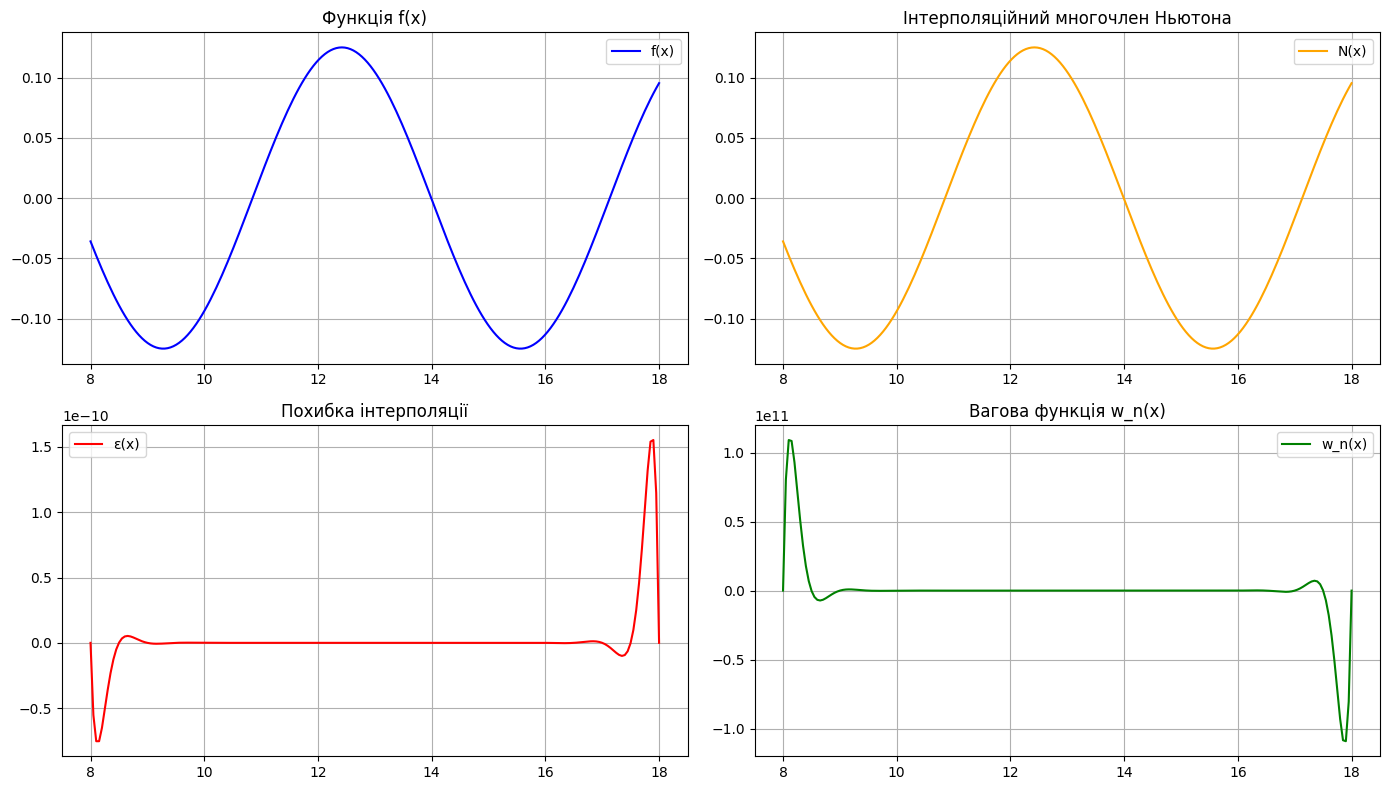

In [21]:
import matplotlib.pyplot as plt

# Вагова функція w_n(x)


def w_n(x, x_nodes):
    w = 1
    for xi in x_nodes:
        w *= (x - xi)
    return w

    
# Сітка
x_plot = np.linspace(x0, xn, 200)
f_plot = f(x_plot)
n_plot = [newton_polynomial(x_nodes, coef, x) for x in x_plot]
eps_plot = f_plot - n_plot
w_plot = [w_n(x, x_nodes) for x in x_plot]

# Побудова графіків
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x_plot, f_plot, label='f(x)', color='blue')
plt.title("Функція f(x)")
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_plot, n_plot, label='N(x)', color='orange')
plt.title("Інтерполяційний многочлен Ньютона")
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_plot, eps_plot, label='ε(x)', color='red')
plt.title("Похибка інтерполяції")
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_plot, w_plot, label='w_n(x)', color='green')
plt.title("Вагова функція w_n(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
ns = [5, 10, 20]
x_test = np.linspace(p, p + 10, 100)
results = {}

for n in ns:
    x_nodes = np.linspace(p, p + 10, n + 1)
    y_nodes = f(x_nodes)
    coef = divided_differences(x_nodes, y_nodes)
    interpolated = np.array([newton_polynomial(x_nodes, coef, x) for x in x_test])
    exact = f(x_test)
    error = np.abs(exact - interpolated)
    results[n] = error
    print(f"n = {n}, Середня похибка: {np.mean(error):.2e}, Максимальна: {np.max(error):.2e}")


n = 5, Середня похибка: 2.17e-02, Максимальна: 8.46e-02
n = 10, Середня похибка: 5.97e-05, Максимальна: 7.09e-04
n = 20, Середня похибка: 6.19e-12, Максимальна: 1.55e-10


In [23]:
ns = [5, 10, 20]
x_fixed = p + 5

for n in ns:
    x_vals = np.linspace(p, p + 10, n + 1)
    y_vals = f(x_vals)
    coef = divided_differences(x_vals, y_vals)
    N_val = newton_polynomial(x_vals, coef, x_fixed)
    real_val = f(x_fixed)
    err = np.abs(real_val - N_val)
    print(f"n = {n:2d}, h = {(x_vals[1] - x_vals[0]):.4f}, f(x) = {real_val:.6f}, N(x) = {N_val:.6f}, похибка = {err:.2e}")


n =  5, h = 2.0000, f(x) = 0.104582, N(x) = 0.087135, похибка = 1.74e-02
n = 10, h = 1.0000, f(x) = 0.104582, N(x) = 0.104582, похибка = 1.39e-17
n = 20, h = 0.5000, f(x) = 0.104582, N(x) = 0.104582, похибка = 1.53e-16
